Import all python library

In [1]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

 Load dataset

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/prith/OneDrive/Desktop/ALL_project_Folder/M7_project_NLP_06-06-2025/Language Detection.csv")
print(df.head)

<bound method NDFrame.head of                                                     Text  \
0       Nature, in the broadest sense, is the natural...   
1      "Nature" can refer to the phenomena of the phy...   
2      The study of nature is a large, if not the onl...   
3      Although humans are part of nature, human acti...   
4      [1] The word nature is borrowed from the Old F...   
...                                                  ...   
10333  à²¨à²¿à²®à³à²® à²¤à²ªà³à²ªà³ à²à²¨à³ à²¬à...   
10334  à²¨à²¾à²°à³à²¸à²¿à²¸à²¾ à²¤à²¾à²¨à³ à²®à³Šà²...   
10335  à²¹à³‡à²—à³† ' à²¨à²¾à²°à³à²¸à²¿à²¸à²¿à²¸à²®à...   
10336  à²…à²µà²³à³ à²ˆà²— à²¹à³†à²šà³à²šà³ à²šà²¿à...   
10337  à²Ÿà³†à²°à³à²°à²¿ à²¨à³€à²µà³ à²¨à²¿à²œà²µà²...   

       Language Recognition. Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0                    English        NaN        NaN        NaN        NaN   
1                    English        NaN        NaN        NaN        NaN   
2                    

Details of data set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10338 entries, 0 to 10337
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Text                    10337 non-null  object
 1    Language Recognition.  10337 non-null  object
 2   Unnamed: 2              1 non-null      object
 3   Unnamed: 3              1 non-null      object
 4   Unnamed: 4              1 non-null      object
 5   Unnamed: 5              1 non-null      object
 6   Unnamed: 6              1 non-null      object
 7   Unnamed: 7              1 non-null      object
 8   Unnamed: 8              1 non-null      object
 9   Unnamed: 9              1 non-null      object
 10  Unnamed: 10             1 non-null      object
 11  Unnamed: 11             1 non-null      object
 12  Unnamed: 12             1 non-null      object
 13  Unnamed: 13             1 non-null      object
 14  Unnamed: 14             1 non-null      object
 15  Un

Column names 

In [4]:
print("Column Names:", df.columns.tolist())


Column Names: ['Text', ' Language Recognition.', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']


Clean column names, Define a text cleaning function,  Apply the cleaning function, 

In [5]:
# Clean column names
df.columns = df.columns.str.strip()

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove numbers
    return text

# Apply cleaning
df['clean_text'] = df['Text'].apply(clean_text)
df['clean_text'] = df['clean_text'].fillna('')
df['Language Recognition.'] = df['Language Recognition.'].fillna('Unknown')

# Tokenization
df['tokens'] = df['clean_text'].apply(word_tokenize)

NLP Preprocessing and Model Prep like Tokenization, TF-IDF Vectorization,  Target Variable

In [6]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# Output variable
y = df['Language Recognition.']

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To evaluate the model

In [7]:
# Model training
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

Evaluation


In [8]:
# Predictions and evaluation
y_pred = model.predict(x_test)
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.9381044487427466

 Confusion Matrix:
 [[100   0   0   5   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  60   0   6   1   0   0   0   0   0   0   0   0   0   4   0   0]
 [  0   0  97   7   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 291   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1 218   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0  83   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0  57   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   7   0   0   0   0   0   0   0   3   0]
 [  0   0   0   8   2   0   0   0 134   0   0   0   0   0   0   0   0]
 [  0   0   0   5   0   0   0   0   0  80   0   0   0   0   0   0   0]
 [  0   0   0  13   0   0   0   0   0   0 107   0   0   0   0   1   0]
 [  0   0   0   3   0   0   0   0   0   0   0 138   0   3   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0 130   0   0   0   0]
 [  0   0   0   5   1   0

Dataset overview

In [9]:
# Dataset overview
print("\n Dataset Head:\n", df.head())
print("\n Dataset Info:")
df.info()
print("\n Null values:\n", df.isnull().sum())
print("\n Language Distribution:\n", df['Language Recognition.'].value_counts())

# Save model and vectorizer
joblib.dump(model, "language_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


 Dataset Head:
                                                 Text Language Recognition.  \
0   Nature, in the broadest sense, is the natural...               English   
1  "Nature" can refer to the phenomena of the phy...               English   
2  The study of nature is a large, if not the onl...               English   
3  Although humans are part of nature, human acti...               English   
4  [1] The word nature is borrowed from the Old F...               English   

  Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 8 Unnamed: 9  ... Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15  \
0      

['vectorizer.pkl']

Prediction Language

In [10]:
# Create Class
def predict_language(text):
    clean = clean_text(text)
    X_test = vectorizer.transform([clean])
    prediction = model.predict(X_test)
    return prediction[0]

#  sample sentences
print("\n Sample Predictions:")
print("➡ 'Bonjour, comment allez-vous?' →", predict_language("Bonjour, comment allez-vous?"))
print("➡ 'Hola, cómo estás?' →", predict_language("Hola, cómo estás?"))
print("➡ 'مرحبا بك' →", predict_language("مرحبا بك"))
print("➡ 'Hej, hvordan går det?' →", predict_language("Hej, hvordan går det?"))
print("➡ 'Ciao amico mio' →", predict_language("Ciao amico mio"))
print("➡ 'Sto imparando la lingua italiana' →", predict_language("Sto imparando la lingua italiana"))





 Sample Predictions:
➡ 'Bonjour, comment allez-vous?' → French
➡ 'Hola, cómo estás?' → Spanish
➡ 'مرحبا بك' → English
➡ 'Hej, hvordan går det?' → Danish
➡ 'Ciao amico mio' → Italian
➡ 'Sto imparando la lingua italiana' → Italian


Create a WordCloud Chart

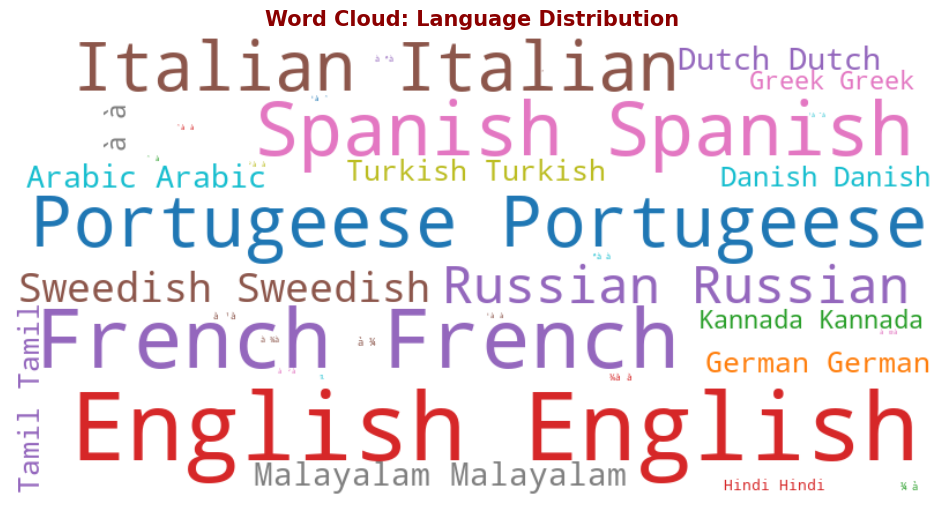

In [11]:
# Chart
df.columns = df.columns.str.strip().str.replace('.', '', regex=False)


language_freq = df['Language Recognition'].value_counts().to_dict()

text_wc = ' '.join([((lang + ' ') * freq).strip() for lang, freq in language_freq.items()])

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='tab10').generate(text_wc)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Language Distribution", fontsize=15, color='darkred', fontweight='bold')




plt.show()

